### https://blog.csdn.net/qq_52813185/article/details/131521150

In [1]:
library(ropls)
library(ggplot2)
library(ggsci)
library(Cairo)
library(tidyverse)
library(extrafont)
loadfonts()

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘ggsci’ was built under R version 4.2.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tibble::view()  mask

In [2]:
library(openxlsx)

Warning message:
“package ‘openxlsx’ was built under R version 4.2.3”


In [78]:
data <- read.xlsx("./新非靶/3.Data/data.xlsx", sheet = 2)

In [79]:
data = data[-1,-1]

In [80]:
library(tibble)
data = as.tibble(data)
data = data[!duplicated(data$Metabolites),]

In [81]:
data = tibble::column_to_rownames(data,'Metabolites')

In [82]:
data[,1:32] = apply(data[,1:32],2,as.numeric)

In [83]:
head(data,2)

,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,KO-NC1,KO-NC2,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Taurodeoxycholic acid,32205423,88058270,357492587,284929716,217060636,42971371,39237214,9509359,182084512,95252657,⋯,130586156,68415775,103746532,80406466,94728717,105078272,140934432,94788181,84242494,86228641
Tauroursodeoxycholic acid,56056895,73887354,236550470,194739240,147128716,41522634,98441510,28485747,129518161,30296294,⋯,111000834,48011420,58071033,42414499,43053758,64354845,72126473,55000229,23601140,45656046


In [84]:
 sampleMetadata= read.table('../workdirV6//sample.txt',sep = '\t',header =T)

In [85]:
rv <- genefilter::rowVars(data)
select <- order(rv, decreasing = TRUE)[seq_len(1000)]
pca_data <- cbind(t(log10(data[select,]+1)),sampleMetadata)

In [87]:
expr_pca <- prcomp(pca_data[,1:100],scale = T,center = T)

In [88]:
library(tidyverse)
library(factoextra)
library(ggplot2)
library(genefilter)

Warning message:
“package ‘factoextra’ was built under R version 4.2.3”
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“package ‘genefilter’ was built under R version 4.2.3”

Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec




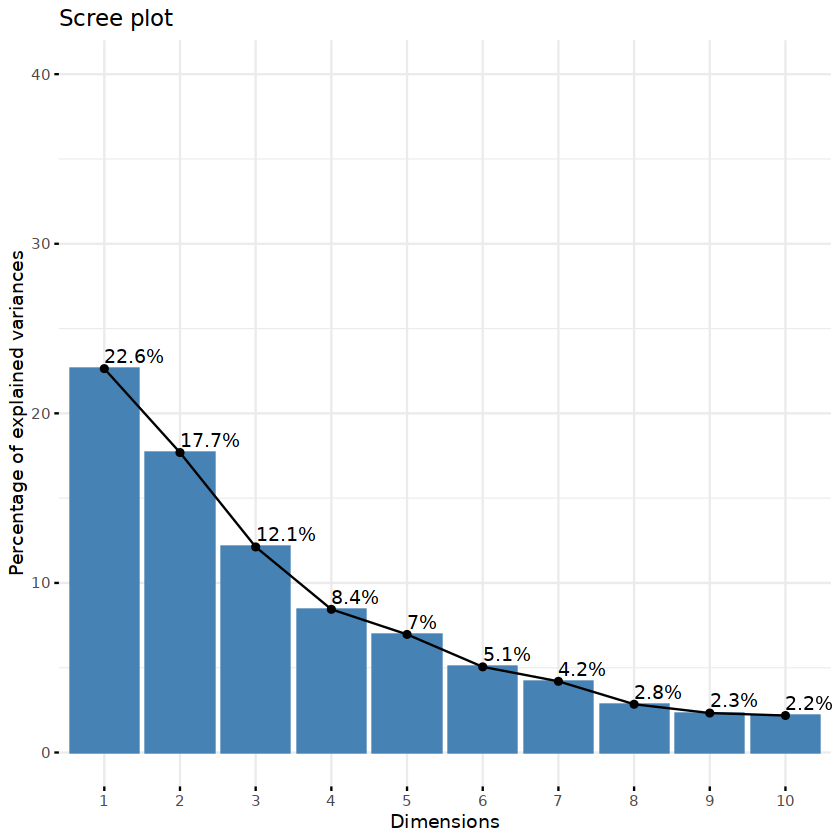

In [89]:
fviz_screeplot(expr_pca, addlabels = TRUE, ylim = c(0, 40))

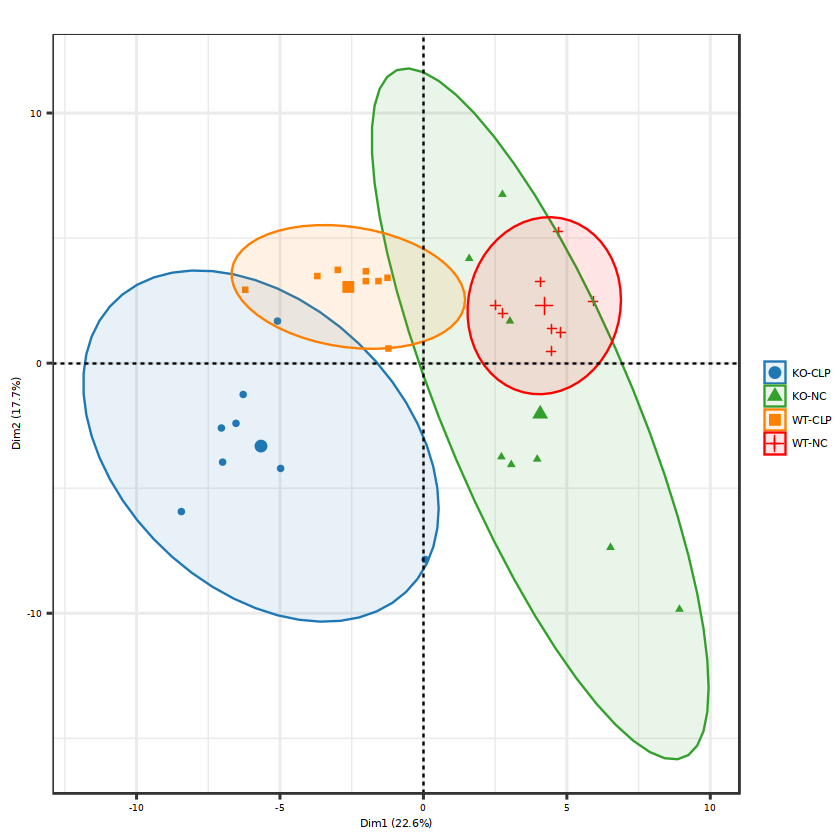

In [90]:
fviz_pca_ind(expr_pca,            
                    label = 'none',             
                    geom.ind = c('point','text'),             
                    habillage = sampleMetadata$group,    #分组变量             
                    addEllipses = T,    
                    repel = F,
                    ellipse.level = c(0.88),             
                    palette = c('#1F78B4','#33A02C','#FF7F00','red')) +  theme_bw((base_size=14))+    
theme(text = element_text(size = 6),        
      legend.margin = margin(-10),        
      axis.text = element_text(size = 5, colour = 'black'),        
      legend.text = element_text(size = 6),        
      legend.title = element_blank(),        
      legend.key.size = unit(0.5, "cm")  )+ggtitle('')

In [52]:
dataMatrix = data

In [53]:
dataMatrix= as.data.frame(t(dataMatrix))

In [59]:
head(dataMatrix,2)

,Taurodeoxycholic acid,Tauroursodeoxycholic acid,Taurocholic acid,Glycocholic acid,Ursodeoxycholic acid,Taurochenodesoxycholic acid,Glycoursodeoxycholic acid,Cholic acid,Chenodeoxycholic acid glycine conjugate,Deoxycholic acid glycine conjugate,⋯,PA(16:0/18:1),PE(14:0),PI(16:0),PS(16:0),PI(16:0/18:1(9Z)),"PI(18:0/20:4(5Z,8Z,11Z,14Z))",18:0-18:1 PS,16:0 PE,PI(18:0),PG(18:0)
KO-CLP1,32205423,56056895,496071913,371757.0,9050243,51788885,166724.2,53880309,9136.261,56667.54,⋯,208678752,3130269,0,859121.7,775305.2,3420613,0,4167122,0,0
KO-CLP2,88058270,73887354,457156989,377164.8,6064914,26529953,165101.3,27067753,9515.255,149501.01,⋯,199946110,4139600,0,644527.5,1050344.9,30237886,0,3004333,0,0


In [16]:
sampleMetadata = read.table('../workdirV6//sample.txt',sep = '\t',header =T,row.names = 1)

In [56]:
dataMatrix = apply(dataMatrix,2,as.numeric)

In [58]:
rownames(dataMatrix) = colnames(data)

In [62]:
groupFc

[1] KO-CLP KO-CLP KO-CLP KO-CLP KO-CLP KO-CLP KO-CLP KO-CLP KO-NC  KO-NC 
[11] KO-NC  KO-NC  KO-NC  KO-NC  KO-NC  KO-NC  WT-CLP WT-CLP WT-CLP WT-CLP
[21] WT-CLP WT-CLP WT-CLP WT-CLP WT-NC  WT-NC  WT-NC  WT-NC  WT-NC  WT-NC 
[31] WT-NC  WT-NC 
Levels: KO-CLP KO-NC WT-CLP WT-NC

Warning message:
“The variance of the 36 following variables is less than 2.2e-16 in the full or partial (cross-validation) dataset: these variables will be removed:
Lithocholic acid glycine conjugate, Epiallolithocholic acid, glycoursocholanic acid (sodium salt), 7,12-Diketolithocholic acid, Taurohyodeoxycholic acid, glycohyocholic acid (sodium salt), Dehydrocholic acid, 3b-ursodeoxyCholic Acid, Isolithocholic acid, Tauro-b-muricholic Acid (sodium salt), Traumatic acid, Undecanoic acid, Dodecanoic acid, Tridecanoic acid, 20-hydroxy Prostaglandin E2, 19(R)-hydroxy Prostaglandin E2, 20-hydroxy Prostaglandin F2a, 20-hydroxy Leukotriene B4, 13,14-dihydro-15-keto Prostaglandin D2, Prostaglandin J2, 5S-hydroxy-12-oxo-6Z,8E,10E,14Z-eicosatetraenoic acid, Leukotriene D4, 12(S)-Leukotriene B4, 5,15-DiHETE, 11,12-Epoxyeicosatrienoic acid, PC(18:0/18:0), PC(20:0), 4-beta-hydroxycholesterol, 22b-Hydroxycholesterol, 25-Hydroxycholesterol, 27-Hydroxycholesterol, 7a-Hydroxycholesterol, PI(16:0), 18:

PCA
32 samples x 108 variables
standard scaling of predictors
36 excluded variables (near zero variance)
      R2X(cum) pre ort
Total    0.552   4   0


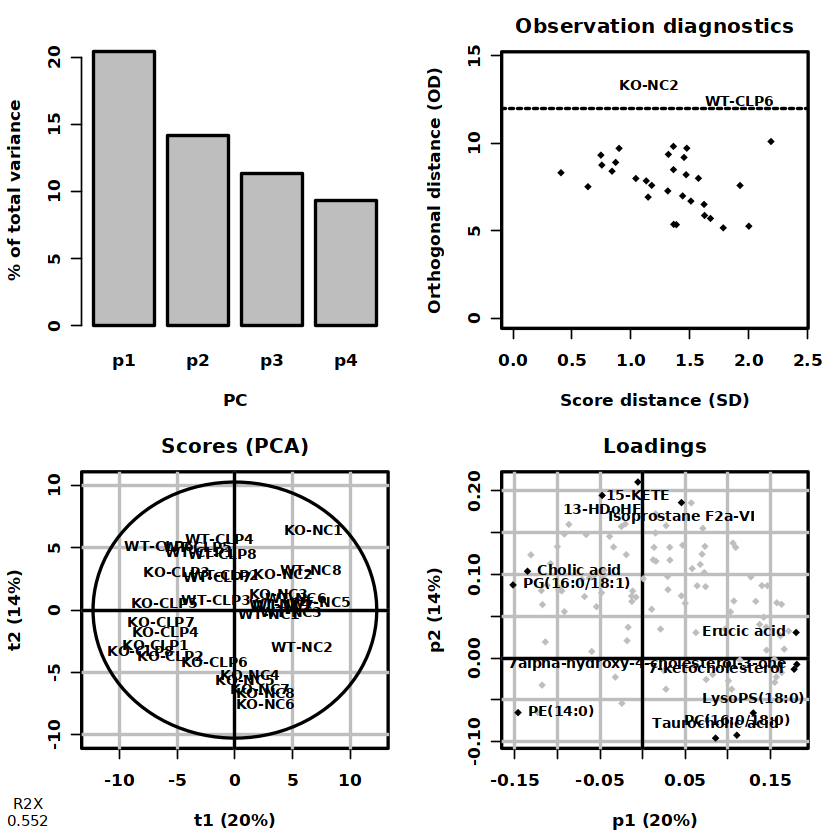

In [60]:
pca = opls(dataMatrix)
groupFc = factor(sampleMetadata[,'group'],levels = c('KO-CLP','KO-NC','WT-CLP','WT-NC'))

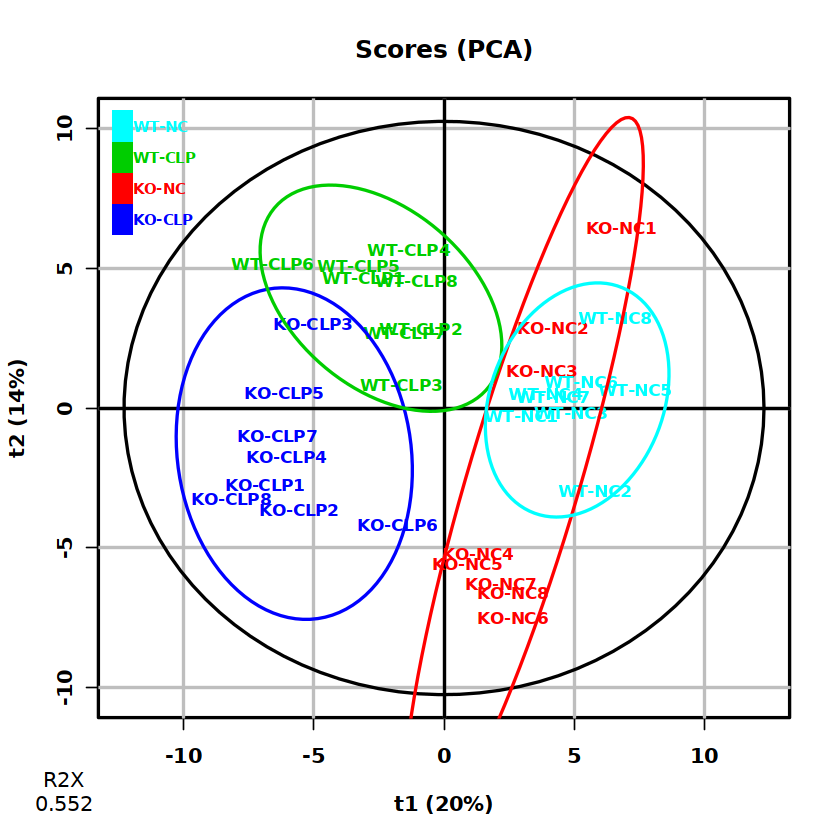

In [63]:
plot(pca, typeVc = "x-score",
     parAsColFcVn = groupFc, parEllipsesL = TRUE)

Warning message:
“The variance of the 36 following variables is less than 2.2e-16 in the full or partial (cross-validation) dataset: these variables will be removed:
Lithocholic acid glycine conjugate, Epiallolithocholic acid, glycoursocholanic acid (sodium salt), 7,12-Diketolithocholic acid, Taurohyodeoxycholic acid, glycohyocholic acid (sodium salt), Dehydrocholic acid, 3b-ursodeoxyCholic Acid, Isolithocholic acid, Tauro-b-muricholic Acid (sodium salt), Traumatic acid, Undecanoic acid, Dodecanoic acid, Tridecanoic acid, 20-hydroxy Prostaglandin E2, 19(R)-hydroxy Prostaglandin E2, 20-hydroxy Prostaglandin F2a, 20-hydroxy Leukotriene B4, 13,14-dihydro-15-keto Prostaglandin D2, Prostaglandin J2, 5S-hydroxy-12-oxo-6Z,8E,10E,14Z-eicosatetraenoic acid, Leukotriene D4, 12(S)-Leukotriene B4, 5,15-DiHETE, 11,12-Epoxyeicosatrienoic acid, PC(18:0/18:0), PC(20:0), 4-beta-hydroxycholesterol, 22b-Hydroxycholesterol, 25-Hydroxycholesterol, 27-Hydroxycholesterol, 7a-Hydroxycholesterol, PI(16:0), 18:

PLS-DA
32 samples x 108 variables and 1 response
standard scaling of predictors and response(s)
36 excluded variables (near zero variance)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.332    0.561   0.477 0.301   2   0 0.05 0.05


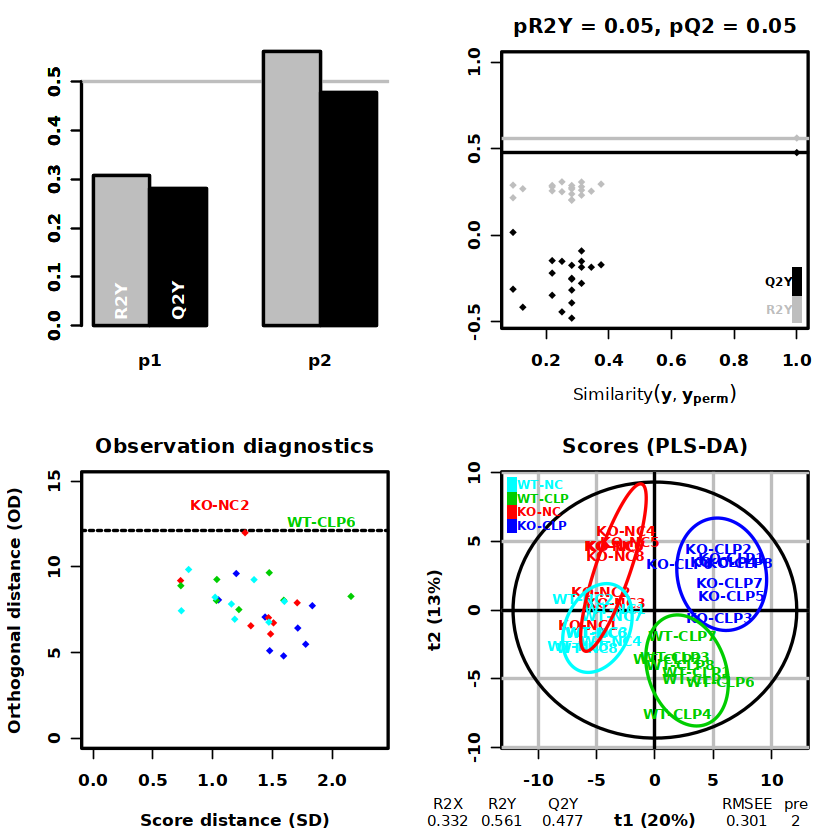

In [64]:
sacurine.plsda <- opls(dataMatrix, groupFc, predI = 2)

In [65]:
sample.score = sacurine.plsda@scoreMN %>% 
  as.data.frame() %>%
  mutate(group = groupFc)

In [66]:
p1 = ggplot(sample.score, aes(p1, p2, color = group)) +
  geom_hline(yintercept = 0, linetype = 'dashed', size = 0.5) +
  geom_vline(xintercept = 0, linetype = 'dashed', size = 0.5) +
  geom_point() +
  geom_point(aes(-10,-10), color = 'white') +
  labs(x = 'P1(10.0%)',y = 'P2(9%)') +
  stat_ellipse(level = 0.95, linetype = 'solid', 
               size = 1, show.legend = FALSE) +
  #scale_color_manual(values = c('#008000','#FFA74F')) +
  theme_bw() +
  theme(legend.position = c(0.9,0.8),
    legend.text = element_text(color = 'black',size = 12, family = 'Arial', face = 'plain'),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
    axis.title = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
    axis.ticks = element_line(color = 'black'))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


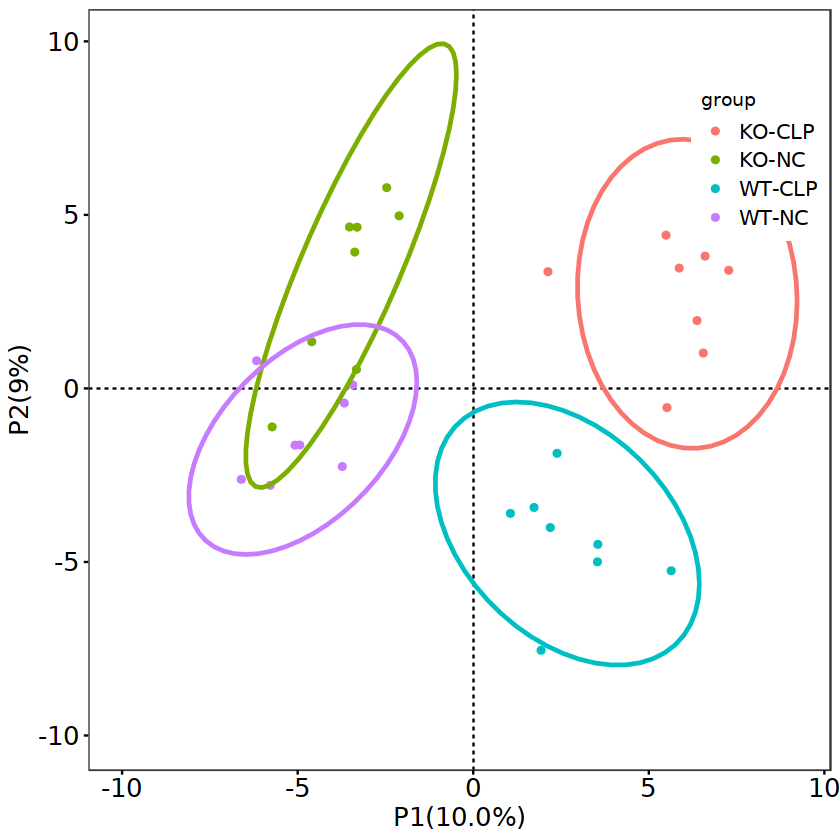

In [67]:
p1

In [21]:
vip.score = as.data.frame(sacurine.plsda@vipVn)
colnames(vip.score) = 'vip'
vip.score$metabolites = rownames(vip.score)
vip.score = vip.score[order(-vip.score$vip),]
vip.score$metabolites = factor(vip.score$metabolites,
                               levels = vip.score$metabolites)

In [23]:

loading.score = sacurine.plsda@loadingMN %>% as.data.frame()
loading.score$metabolites = rownames(loading.score)
 
all.score = merge(vip.score, loading.score, by = 'metabolites')
 
all.score$cat = paste('A',1:nrow(all.score), sep = '')

In [24]:

p2 = ggplot(all.score[all.score$vip >= 1,], aes(cat, vip)) +
  geom_segment(aes(x = cat, xend = cat,
                   y = 0, yend = vip)) +
  geom_point(shape = 21, size = 5, color = '#008000' ,fill = '#008000') +
  geom_point(aes(1,2.5), color = 'white') +
  geom_hline(yintercept = 1, linetype = 'dashed') +
  scale_y_continuous(expand = c(0,0)) +
  labs(x = '', y = 'VIP value') +
  theme_bw() +
  theme(legend.position = 'none',
        legend.text = element_text(color = 'black',size = 12, family = 'Arial', face = 'plain'),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        axis.text = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
        axis.text.x = element_text(angle = 90),
        axis.title = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
        axis.ticks = element_line(color = 'black'),
        axis.ticks.x = element_blank())


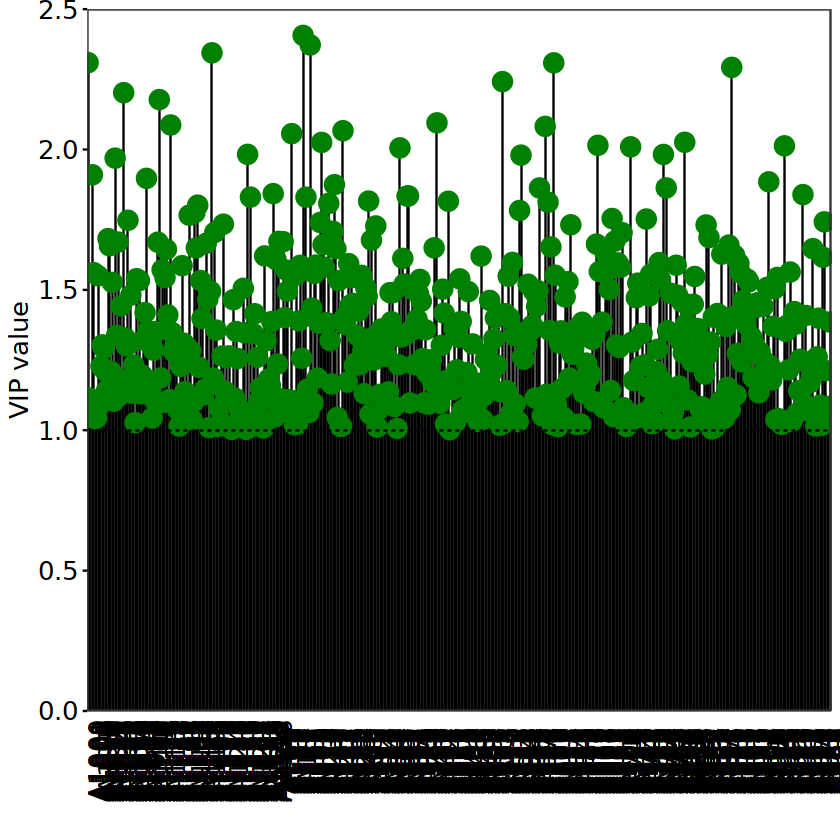

In [25]:
p2

In [43]:
Sys.setlocale('LC_ALL','C')

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [51]:
aa = cbind(as.data.frame(all.score$metabolites),all.score$vip)

In [52]:
colnames(aa) = c('metabolites','vip')

In [56]:
write.csv(aa,file = 'vip.csv',row.names =F)